In [1]:
#import libraries
import pandas as pd

In [2]:
#load and read the dataset
dataset = pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
# to find number of rows and col's
no_of_rows_and_col=dataset.shape
print("Number of rows and columns:",no_of_rows_and_col)
# Here the number of rows = 1338 and the columns = 6

Number of rows and columns: (1338, 6)


In [4]:
#to list the col names
dataset.columns
# here 'age', 'sex', 'bmi', 'children', 'smoker' - are input
#'charges' - are output

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [5]:
# preprocessing to convert categorical value to numerical 

dataset.sex[dataset.sex == 'male']=1
dataset.sex[dataset.sex == 'female']=2

dataset.smoker[dataset.smoker == 'yes']=1
dataset.smoker[dataset.smoker == 'no']=0
dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_1172\4071425206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.sex[dataset.sex == 'male']=1
C:\Users\HP\AppData\Local\Temp\ipykernel_1172\4071425206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.sex[dataset.sex == 'female']=2
C:\Users\HP\AppData\Local\Temp\ipykernel_1172\4071425206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.smoker[dataset.smoker == 'ye

,age,sex,bmi,children,smoker,charges
0,19,2,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,2,31.920,0,0,2205.98080
1335,18,2,36.850,0,0,1629.83350
1336,21,2,25.800,0,0,2007.94500


In [6]:
# assign input and output value
independent = dataset[['age', 'sex', 'bmi', 'children', 'smoker']]
print(independent)
dependent = dataset[['charges']]
print(dependent)

      age sex     bmi  children smoker
0      19   2  27.900         0      1
1      18   1  33.770         1      0
2      28   1  33.000         3      0
3      33   1  22.705         0      0
4      32   1  28.880         0      0
...   ...  ..     ...       ...    ...
1333   50   1  30.970         3      0
1334   18   2  31.920         0      0
1335   18   2  36.850         0      0
1336   21   2  25.800         0      0
1337   61   2  29.070         0      1

[1338 rows x 5 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [7]:
# spliting training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
X_train,X_test,Y_train,Y_test

(      age sex     bmi  children smoker
 1163   18   2  28.215         0      0
 196    39   2  32.800         0      0
 438    52   2  46.750         5      0
 183    44   2  26.410         0      0
 1298   33   1  27.455         2      0
 ...   ...  ..     ...       ...    ...
 763    27   1  26.030         0      0
 835    42   1  35.970         2      0
 1216   40   1  25.080         0      0
 559    19   1  35.530         0      0
 684    33   2  18.500         1      0
 
 [936 rows x 5 columns],
       age sex     bmi  children smoker
 578    52   1  30.200         1      0
 610    47   2  29.370         1      0
 569    48   1  40.565         2      1
 1034   61   1  38.380         0      0
 198    51   2  18.050         0      0
 ...   ...  ..     ...       ...    ...
 1261   28   1  37.100         1      0
 494    21   1  25.700         4      1
 97     55   1  38.280         0      0
 418    64   1  39.160         1      0
 920    62   2  25.000         0      0
 
 [402 rows 

In [45]:
#Model creation
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='auto')
# regressor=DecisionTreeRegressor(criterion='poisson',splitter='best')
regressor=regressor.fit(X_train,Y_train)

C:\Anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


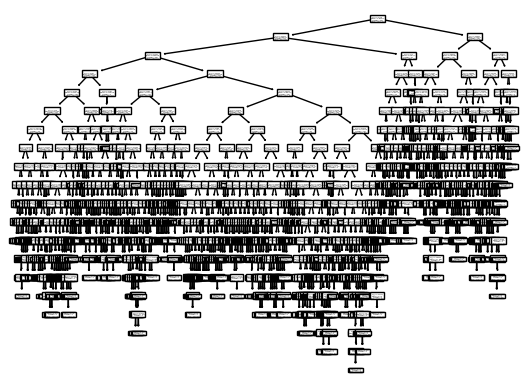

In [46]:
# ploting graph
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [47]:
# testing
test_pred= regressor.predict(X_test)
test_pred

array([ 9748.9106  ,  8930.93455 , 44202.6536  , 13143.86485 ,
        9264.797   , 21984.47061 ,  2196.4732  , 10560.4917  ,
        7418.522   ,  6799.458   ,  6184.2994  , 10156.7832  ,
        6849.026   ,  4571.41305 , 18246.4955  , 10600.5483  ,
       12142.5786  ,  2904.088   ,  6600.361   , 18648.4217  ,
       24869.8368  , 13430.265   ,  9625.92    , 22331.5668  ,
        1826.843   ,  3875.7341  ,  3161.454   ,  7418.522   ,
        3757.8448  ,  8027.968   ,  7418.522   , 48673.5588  ,
       13555.0049  , 10982.5013  , 20167.33603 ,  3554.203   ,
        8733.22925 , 37607.5277  , 39836.519   ,  1880.07    ,
        5266.3656  ,  2866.091   , 21082.16    , 47896.79135 ,
       35585.576   ,  3579.8287  , 10600.5483  ,  6358.77645 ,
        4719.52405 , 12032.326   ,  2020.5523  ,  3056.3881  ,
       21978.6769  , 60021.39897 , 11856.4115  ,  2689.4954  ,
        1981.5819  ,  8835.26495 ,  7441.501   , 14349.8544  ,
        1252.407   , 41999.52    , 27941.28758 , 25333.

In [48]:
#Evalution Metrics
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,test_pred)
r2
# r2 should be nearer to 1 here it is not performing good for this dataset

0.7284341336628202